In [1]:
import blur
import matplotlib.pyplot as plt
%matplotlib notebook

File accessed:  hico_data/H2014064000912.L1B_ISS.nc
Bands:  87
line:  [[ 473 1148  483 1148]]
line:  [[ 473 1147  487 1147]]
line:  [[ 261 1148  275 1148]]
line:  [[ 278 1335  288 1335]]
line:  [[ 262 1149  276 1149]]
line:  [[ 472 1146  487 1146]]
line:  [[ 489 1667  501 1667]]
line: [ 278 1335  288 1335]
Edge: [0.45919999 0.44839999 0.42999999 0.39479999 0.35759999 0.25359999
 0.1596     0.1408     0.1412     0.1396     0.138     ]


<IPython.core.display.Javascript object>


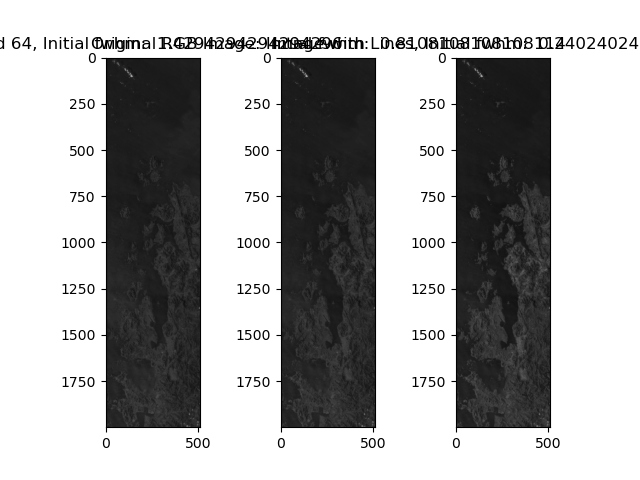

[3.5, 3.4025419145484044, 3.3073769605192, 3.214505137912385, 3.1239264467279613, 3.0356408869659273, 2.9496484586262843, 2.8659491617090316, 2.78454299621417, 2.7054299621416984, 2.628610059491617, 2.5540832882639264, 2.4818496484586263, 2.4119091400757164, 2.344261763115197, 2.2789075175770686, 2.21584640346133, 2.1550784207679827, 2.0966035694970255, 2.0404218496484585, 1.9865332612222821, 1.9349378042184964, 1.885635478637101, 1.8386262844780963, 1.7939102217414817, 1.7514872904272578, 1.7113574905354245, 1.6735208220659814, 1.6379772850189291, 1.604726879394267, 1.5737696051919956, 1.5451054624121145, 1.5187344510546241, 1.4946565711195239, 1.4728718226068145, 1.4533802055164953, 1.4361817198485667, 1.4212763656030285, 1.408664142779881, 1.3983450513791238, 1.390319091400757, 1.384586262844781, 1.3811465657111952, 1.38, 1.3811465657111952, 1.384586262844781, 1.390319091400757, 1.3983450513791238, 1.408664142779881, 1.4212763656030285, 1.4361817198485667, 1.4533802055164953, 1.4728

/cluster/home/kimado/HYPSO-1/blur.py:283: RuntimeWarning: overflow encountered in exp
  return a/(1+np.exp((x-b)/c)) + d


In [2]:
ba = blur.blurCube()

ba.get_cube()

ba.read_cube()

ba.visualize_cube()

ba.parabole_func()
print(ba.desired_fwhm)
ba.blur_cube()
